In [1]:
# Chocolate Test

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Current directory

os.getcwd()

'C:\\Users\\johnp'

In [4]:
os.chdir(r'C:\Users\johnp\Documents\Python Scripts')

In [5]:
candydf = pd.read_csv(r'C:\Users\johnp\Downloads\Datasets\the-ultimate-halloween-candy-power-ranking\candy-data.csv')
candydf.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [6]:
# Response Variable

y = candydf.iloc[:,1]

In [7]:
# Explainatory Variable

X = candydf
X.head(2)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936


In [8]:
X.shape

(85, 13)

In [9]:
# Normalizing the winpercent

#X['winpercent_nrmz'] = (X['winpercent'] - X['winpercent'].min()) / (X['winpercent'].max() - X['winpercent'].min()) 

In [10]:
# Create a binary column on the condition if caramel & nougat

X['caramelnougat'] = 0

# find all rows that fulfills your conditions and set class to 1
X.loc[(X['caramel'] == 1) & # if candy bar is caramel
       (X['nougat'] == 1), # if candy bar is nougat
       'caramelnougat'] = 1 # then set class to 1
X.head(3)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,caramelnougat
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,0
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0


In [11]:
X.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,caramelnougat
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,0
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,0


In [12]:
X['winpercent_stdz'] = ((X['winpercent'] - X['winpercent'].mean())/ X['winpercent'].std())

In [13]:
#X['winpercent'].describe()

In [14]:
# Functions

def sigmoid(h):
    return 1 / (1 + np.exp(-h))

def cross_entropy(y, p):
    return -np.sum(y*np.log(p) + (1 - y)*np.log(1 - p))

def accuracy(y, p):
    return np.mean(y == np.round(p))

In [15]:
# WITHOUT THE DUMMY VARIABLES

PHI = X.iloc[:,2:]
PHI.head(3)

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,caramelnougat,winpercent_stdz
0,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0,1.131885
1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,0,1.174783
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0,-1.227079


In [16]:
N, D = PHI.shape

In [17]:
# Data Prep
PHI.head(3)

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,caramelnougat,winpercent_stdz
0,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0,1.131885
1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,0,1.174783
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0,-1.227079


In [18]:
PHI.count()

fruity              85
caramel             85
peanutyalmondy      85
nougat              85
crispedricewafer    85
hard                85
bar                 85
pluribus            85
sugarpercent        85
pricepercent        85
winpercent          85
caramelnougat       85
winpercent_stdz     85
dtype: int64

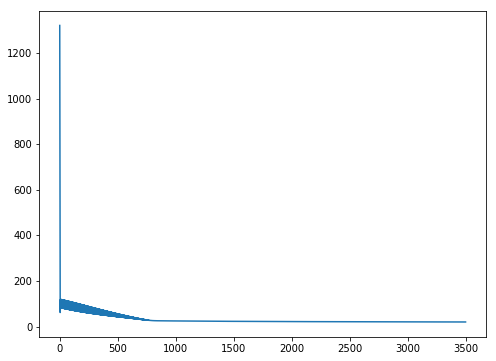

In [19]:
# Train the Model
#w = np.zeros((D,1))
w = np.random.randn(D)

lambda2 = 0

J = []
eta = 7e-5
epochs = 3500


for t in range(epochs):
    p = sigmoid(PHI.dot(w))
    J.append(cross_entropy(y,p) + lambda2*w.dot(w)) # adding lambda times w_l2 matrix multiplied by w_l2
    w -= eta*(PHI.T.dot(p - y) + lambda2*w) # adding lambda times w_l2
    
plt.figure(figsize = (8,6))
plt.plot(J)

In [20]:
# Report Accuracy

print("Accuracy: {}".format(accuracy(y, p)))

Accuracy: 0.9411764705882353


In [21]:
roc_matrix = np.column_stack((p, np.round(p), y))
#roc_matrix

In [22]:
sorted_roc = roc_matrix[roc_matrix[:,0].argsort()[::-1],:]
#sorted_roc

In [23]:
# Calc True Positive and True Negative 

tp = np.cumsum((sorted_roc[:,1] == 1) & (sorted_roc[:,2] == 1))/np.sum(sorted_roc[:,2] == 1)
tn = np.cumsum((sorted_roc[:,1] == 0) & (sorted_roc[:,2] == 0))/np.sum(sorted_roc[:,2] == 0)
fp = np.cumsum((sorted_roc[:,1] == 1) & (sorted_roc[:,2] == 0))/np.sum(sorted_roc[:,2] == 1)
fn = np.cumsum((sorted_roc[:,1] == 0) & (sorted_roc[:,2] == 1))/np.sum(sorted_roc[:,2] == 0)

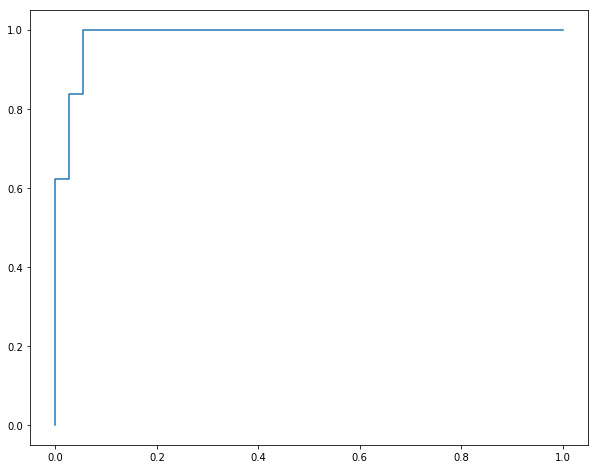

In [24]:
# adding a 0 and 1 to the array to show on the graph
tp = np.array([0] + tp.tolist() + [1])
fp = np.array([0] + fp.tolist() + [1])
               
plt.figure(figsize = (10,8))
plt.step(fp,tp)

In [25]:
# calculates the area under the step curve which is the accuracy of the model

auc = tp[1:].dot(np.diff(fp))

In [26]:
print("ROC/AUC: {}".format(auc))

ROC/AUC: 0.985390796201607


In [27]:
ypred = roc_matrix[:,1]
#ypred

In [28]:


TN = 0 # True Negatives: PREDICTED NO ACTUAL NO
FP = 0 # False Positives: PREDICTED YES ACTUAL NO (type 1 error)
FN = 0 # False Negatives: PREDICTED NO ACTUAL YES (type 2 error)
TP = 0 # True Positives: PREDICTED YES ACTUAL YES 


for i in range(len(ypred)): 
    if y[i]==ypred[i]==0:
        TN += 1    
    if ypred[i]==1 and y[i]!=ypred[i]:
        FP += 1    
    if ypred[i]==0 and y[i]!=ypred[i]:
        FN += 1    
    if y[i]==ypred[i]==1:
        TP += 1


print(TN, FP)
print(FN, TP)

46 2
3 34


In [29]:
# Accuracy: Overall, how often is the classifier correct?

Acc = (TP + TN)/N
Acc

0.9411764705882353

In [30]:
# Missclassification Rate: Overall, how often is it wrong?
# ERROR RATE
Miss = (FP + FN)/N
Miss

0.058823529411764705

In [31]:
# True Positive Rate: When its actually yes, how often does it 
# predict yes
# SENSITIVITY OR RECALL

TPR = TP/(FN + TP)
TPR

0.918918918918919

In [32]:
# False Positive Rate: When its actually no, how often does it
# predict yes

FPR = FP / (TN + FP)
FPR

0.041666666666666664

In [33]:
# True Negative Rate: When its actually no, how often does it 
# predict no
# SPECIFICITY

TNR = TN / (TN + FP)
TNR

0.9583333333333334

In [34]:
# Precision: When it predicts yes, how often is it correct

Pre = TP / (FP + TP)
Pre

0.9444444444444444

In [35]:
# Prevalence: How often does the yes condition actually occur
# in our sample

Preval = (FN + TP) / N
Preval

0.43529411764705883

In [36]:
# F-1 Score (also F-score or F-measure) is a meausre of test 
# accuracy. 

In [37]:
bestw = w.copy()
bestw

fruity             -3.041336
caramel             0.007433
peanutyalmondy      0.461129
nougat              0.809344
crispedricewafer    0.379902
hard               -2.226410
bar                -0.063391
pluribus           -0.206486
sugarpercent       -0.139916
pricepercent       -0.180043
winpercent          0.024708
caramelnougat      -0.426827
winpercent_stdz     1.176936
dtype: float64

In [38]:
w

fruity             -3.041336
caramel             0.007433
peanutyalmondy      0.461129
nougat              0.809344
crispedricewafer    0.379902
hard               -2.226410
bar                -0.063391
pluribus           -0.206486
sugarpercent       -0.139916
pricepercent       -0.180043
winpercent          0.024708
caramelnougat      -0.426827
winpercent_stdz     1.176936
dtype: float64

In [39]:
# Artifical Neural Network


In [40]:
# Functions

def one_hot_encode(y): 
    N = len(y)
    K = len(set(y))
    Y = np.zeros((N,K))
    
    for i in range (N):
        Y[i, y[i]] = 1
    return Y

def softmax(H):
    eH = np.exp(H)
    return eH / eH.sum(axis = 1, keepdims = True)

def feed_forward(X, W1, b1, W2, b2):
    Z1 = np.tanh(np.matmul(X, W1) + b1)
    P = softmax(np.matmul(Z1 ,W2) + b2)
    return Z1, P

def cross_entropy(Y, P):
    return -np.sum(Y*np.log(P))

In [41]:
Phi = X.iloc[:,2:]

In [42]:
N, D = Phi.shape

In [43]:
Y = one_hot_encode(y)


In [44]:
K = len(set(y))

In [45]:
# Build Model

M1 = 5 # hyperparameter to optimize in projects

W1 = np.random.randn(D,M1)
b1 = np.random.randn(M1)
W2 = np.random.randn(M1,K)
b2 = np.random.randn(K)

In [46]:
feed_forward(Phi, W1, b1, W2, b2)[-1]

ValueError: Shape of passed values is (85, 5), indices imply (85, 13)

In [ ]:
#np.matmul(Z1,W2)
W2.shape

In [ ]:
b2.shape

In [ ]:
# Train Model

J = []
eta = 5e-5
epochs = 3500

for epoch in range(epochs):
    Z1, P = feed_forward(Phi,W1,b1,W2,b2)
    J.append(cross_entropy(Y,P))
    
    dW2 = np.matmul(Z1.T, P - Y)
    db2 = (P - Y).sum(axis = 0)
    W2 -= eta*dW2
    b2 -= eta*db2

    dW1 = np.matmul(Phi.T, np.matmul(P - Y, W2.T)*(1 - Z1*Z1))
    db1 = (np.matmul(P - Y, W2.T)*(1 - Z1*Z1)).sum(axis = 0)
    W1 -= eta*dW1
    b1 -= eta*db1
    
plt.plot(J)

In [ ]:
w_l2 = w.copy() # We can still randomize our weights

lambda2 = 0.2

JL2 = []
eta = 3e-9
epochs = 2000

for t in range(epochs):
    p_l2 = sigmoid(PHI.dot(w_l2))
    JL2.append(cross_entropy(y,p_l2) + lambda2*w_l2.dot(w_l2)) # adding lambda times w_l2 matrix multiplied by w_l2
    w_l2 -= eta*(PHI.T.dot(p_l2 - y) + lambda2*w_l2) # adding lambda times w_l2
    
plt.figure(figsize = (8,6))
plt.plot(JL2)

In [ ]:
# Report Accuracy

print("Accuracy: {}".format(accuracy(y, p_l2)))